

```
# This is formatted as code
```

**Expectation:** find solution to MSE regression using GD, Line search, GD with Momentum and 2nd Order Method, and gradient free methods.


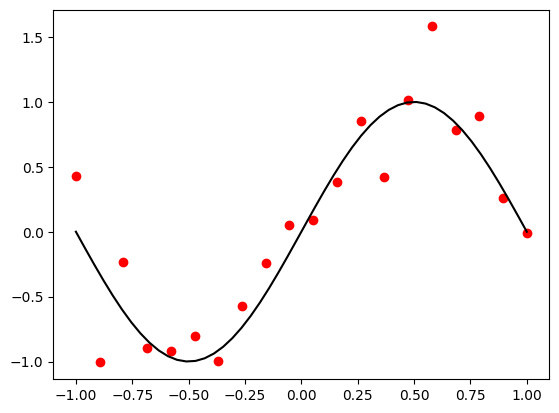

In [ ]:
#Linear Regression for general functions
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import math
pi=math.pi

data_set_size = 20
noise_level = 0.3

# generate 20 numbers from -1 to 1 with equal stepsize
x=np.linspace(-1,1,data_set_size)

# generate training target (noise contaminated!)
y=np.sin(2*pi*.5*x)+noise_level*np.random.randn(x.size)

# plot the training data points
plt.plot(x, y, 'ro')

# plot the true function
plt.plot(np.linspace(-1,1,50), np.sin(2*pi*.5*np.linspace(-1,1,50)), 'black')

In [ ]:
N = x.shape[0]
M = 10
d = M+1 # dimnesionality
X = []
for i in range(M+1):
  X.append(x**i)

X = np.array(X).T

print('x',X.shape)
print('y',y.shape)


x (20, 11)
y (20,)


In previous class we found w $\mathbf{w}$ using the closed form solution, today we first find $\mathbf{w}$ using Gradient Decent (GD). *Note for this toy example the is no reason to use a iterative optimiser, as the exact method exsist but it makes for a nice test bed.*

The Mean Squared Loss / Mean Squared Error (MSE) can be written as follows:

\begin{equation}
  L(\mathbf{w}) = \frac{1}{N}\sum_{n=1}^N(\sum_{i=1}^{d+1} x_{n,i} \cdot w_i - y_n)^2
\end{equation}

Or writen with matrices:

\begin{equation}
  L(\mathbf{w}) = \frac{1}{N} ||X\mathbf{w} - \mathbf{y}||_2^2 = \frac{1}{N} (X\mathbf{w} - \mathbf{y})^\top(X\mathbf{w} - \mathbf{y})
\end{equation}

**Question 1** Derive the gradeint of the MSE. Write you awnser here in latex:

\begin{equation}
  \nabla_\mathbf{w} L(\mathbf{w}) =
\end{equation}

We then use the following update:

**Question 2** prove that $L$ is convex in $\mathbf{w}$ (*hint think about the Hessain*)

Write you awnser here in latex:


**Gradient Descent**

We will first optimise $L(\mathbf{w})$ using Gradient Descent.

Which uses the following update:


\begin{equation}
  \mathbf{w}_{t+1} = \mathbf{w}_t - \eta_t \nabla_\mathbf{w} L(\mathbf{w})
\end{equation}


**Question 3** complete the functions below to calcuate the loss and gradients for a given $X$, $\mathbf{y}$ & $\mathbf{w}$.

In [ ]:
# It useful to first write a function that calculates the loss we will use this to measure our progress

def MSE_loss(X, y, w):
  mean_loss = 0 # your code here
  return mean_loss


In [ ]:
# a quick sanity check for your loss function, If this cell throws and error your loss function still needs work!
assert MSE_loss(np.array([0]), np.array([0]), np.array([0])) == 0
assert MSE_loss(np.array([1]), np.array([1]), np.array([1])) == 0
assert MSE_loss(np.array([1]), np.array([1]), np.array([0])) == 1
assert MSE_loss(np.array([1]), np.array([0]), np.array([1])) == 1

In [ ]:
# It is also useful to have a function that calculate gradient at a given point
def grad_func(x, y, w):
  n = x.shape[0]
  gradient = 0
  return gradient

In [ ]:
# a quick sanity check for your gradient function, If this cell throws and error your gradient fucntion still needs work!
assert la.norm(grad(np.array([[0,0],[0,0]]), np.zeros((2,1)), np.ones((2,1)))) == 0
assert la.norm(grad(np.array([[1,0],[0,0]]), np.zeros((2,1)), np.ones((2,1)))) == 1
assert la.norm(grad(np.array([[4,3],[4,3]]), np.zeros((2,1)), np.ones((2,1)))) == 70

**Question 4** Implement GD and run for 1000 steps. Save the loss value after each step in the list 'gd_losses'.

In [ ]:
# In order to use an iterative optimisation method we need an initial guess:

w = np.zeros(M+1)

gd_losses = []
gd_losses.append(MSE_loss(X, y, w))

# ... and a step size

eta = 1e-2

number_of_iteratons = 1000

for iter in range(number_of_iteratons):
  # ----------------------------
  # Your code here


  # ----------------------------
  loss = MSE_loss(X, y, w)
  gd_losses.append(loss)
  if iter % 100 == 99:
    print(loss)

plt.plot(np.arange(len(gd_losses)),gd_losses, 'red')

**Question 5** Experiment different powers of ten for the step sizes $\eta$, empically what value is the largest for which you get good performance? What does this suggest about the smoothness of $L(\mathbf{w})$?

**Gradient Descent with Backtracing Line Search**

We will now optimise L using GD however we will use a line search method to select $\eta$ at each update according to the Armijo-Goldstein Condition with hyperparameter c.

\begin{align*}
f(\mathbf{w} - \eta_{t,k}\nabla f(\mathbf{w})) \leq f(\mathbf{w}) - c \eta_{t,k} \| \nabla f(\mathbf{w})\|^2,
\end{align*}

In [ ]:
def check_armijo_goldstein_condtions(grad, loss, trail_point_loss, eta, c):
  grad_norm = np.linalg.norm(grad)
  if trail_point_loss <= loss - c * eta * grad_norm:
    return True
  else:
    return False

To run the backtracking line search we first select a trial point $\mathbf{w}'$,  according to $\mathbf{w}_0' = \mathbf{w}_t - \eta_{t,0} \nabla f$ where $\eta_0 = \gamma$. If a trial point satisfies the acceptance condition, we set $\mathbf{w}_t = \mathbf{w}_t'$, otherwise  $\eta_{t,k+1} = \alpha \eta_{t,k}$. And select the next trail point according to $\mathbf{w}_t' = \mathbf{w}_t - \eta_{t,k} \nabla f$.

**Question 6** Implement GD with backtracking line search and run if for 1000 steps, save the loss value after each step in the list 'line_search_losses'.

In [ ]:
w = np.zeros(M+1)

line_search_losses = []
line_search_losses.append(MSE_loss(X, y, w))

c = 0.001
gamma = 10
alpha = 0.8
max_k = 50 # make number of line search steps

number_of_iteratons = 1000
loss = MSE_loss(X, y, w)

for iter in range(number_of_iteratons):
  # ----------------------------
  # Your code here


  # once we have found a point that satisfies the condition we take a step using this step size
  # ----------------------------
  w -= eta * grad
  eta = gamma # set eta back to its intial value
  loss = MSE_loss(X, y, w)
  line_search_losses.append(loss)

  if iter % 100 == 99:
    print(loss)


plt.plot(np.arange(len(gd_losses)),gd_losses, 'red')
plt.plot(np.arange(len(line_search_losses)),line_search_losses, 'green')

**Gradient Descent with Momentum**

\begin{align*}
\mathbf{m}_{0} &= 0,\\
\mathbf{m}_{t+1} &= \mu \mathbf{m}_{t} - \eta_t \nabla f(\mathbf{w}_t),\\
\mathbf{w}_{t+1} &= \mathbf{w}_{t} + \mathbf{m}_{t+1}.
\end{align*}

**Question 7** Implement GD with momentum for 1000 steps, save the loss value after each step in the list 'gd_with_momenutm_losses'. What do you notice when compairing against GD without Momentum?

In [ ]:
w = np.zeros(M+1)
momentum = np.zeros(M+1)

gd_with_momenutm_losses = []
gd_with_momenutm_losses.append(MSE_loss(X, y, w))

# ... and a step size

eta = 1e-2
mu = 0.9

number_of_iteratons = 1000

for iter in range(number_of_iteratons):
  # ----------------------------
  # Your code here

  # ----------------------------
  loss = MSE_loss(X, y, w)
  gd_with_momenutm_losses.append(loss)
  if iter % 100 == 99:
    print(loss)

plt.plot(np.arange(len(gd_losses)),gd_losses, 'red', label='gd')
plt.plot(np.arange(len(line_search_losses)),line_search_losses, 'green')
plt.plot(np.arange(len(gd_with_momenutm_losses)),gd_with_momenutm_losses, 'blue', label='gd_with_momentum')

**Gradient Descent with Nesterov Momentum**


\begin{align*}
\mathbf{m}_{0} &= 0,\\
\mathbf{m}_{t+1} &= \mu \mathbf{m}_{t} - \eta \nabla f(\mathbf{w}_t + \mu \mathbf{m}_{t}),\\
\mathbf{w}_{t+1} &= \mathbf{w}_{t} + \mathbf{m}_{t+1}.
\end{align*}

**###Optional### Question 8** Implement GD with nesterov momentum for 1000 steps, save the loss value after each step in the list 'gd_with_momenutm_losses'.

In [ ]:
w = np.zeros(M+1)
momentum = np.zeros(M+1)

gd_with_nesterov_momenutm = []
gd_with_nesterov_momenutm.append(MSE_loss(X, y, w))

# ... and a step size

eta = 1e-2
mu = 0.9

number_of_iteratons = 1000

for iter in range(number_of_iteratons):
  # ----------------------------
  # Your code here

  # ----------------------------
  loss = MSE_loss(X, y, w)
  gd_with_nesterov_momenutm.append(loss)
  if iter % 100 == 99:
    print(loss)

plt.plot(np.arange(len(gd_losses)),gd_losses, 'red', label='gd')
plt.plot(np.arange(len(line_search_losses)),line_search_losses, 'green')
plt.plot(np.arange(len(gd_with_momenutm_losses)),gd_with_momenutm_losses, 'blue', label='gd_with_momentum')
plt.plot(np.arange(len(gd_with_nesterov_momenutm)),gd_with_nesterov_momenutm, 'yellow', label='gd_with_momentum')

**Exact Second Order**

\begin{align*}
\mathbf{w}_{t+1} = \mathbf{w}_{t} -{H}_f^{-1}\nabla f(\mathbf{w}_t).
\end{align*}

Where ${H}_f$ is the hessain.

**Question 9** Implement the exact second order optimiser 1000 steps, save the loss value after each step in the list 'second_order_losses'.

In [ ]:
w = np.zeros(M+1)

second_order_losses = []
second_order_losses.append(MSE_loss(X, y, w))

# ... note here we don't need learning rate

number_of_iteratons = 1000

for iter in range(number_of_iteratons):
  # ----------------------------
  # Your code here

  # ----------------------------
  loss = MSE_loss(X, y, w)
  second_order_losses.append(loss)
  if iter % 100 == 99:
    print(loss)

plt.plot(np.arange(len(second_order_losses)),second_order_losses, 'black')
plt.plot(np.arange(len(gd_losses)),gd_losses, 'red', label='gd')
plt.plot(np.arange(len(line_search_losses)),line_search_losses, 'green')
plt.plot(np.arange(len(gd_with_momenutm_losses)),gd_with_momenutm_losses, 'blue', label='gd_with_momentum')
plt.plot(np.arange(len(gd_with_nesterov_momenutm)),gd_with_nesterov_momenutm, 'yellow', label='gd_with_momentum')


**Question 10** Try adjusting the learning rates, which optimier is quickest? How many steps does it take to converge? Why is this? Which is the second quickest?



**Reading** - Gradient Free Optimiation



Gradient Free Coodinate Descent

Gradient free optimisers are useful when the gradient can't easily be calculated. Instead of using the gradient they only use loss values. They start by picking a candidate direction $\mathbf{p}_t$ and then evalulating the loss in the direction of $\mathbf{p}_t$.


In this assignment you will code up the three point alogruthm that selects the next point according to:

\begin{equation}
\mathbf{w}_{t+1} = \text{argmin}\{ f(\mathbf{w}_t - \eta \mathbf{p}_t), f(\mathbf{w}_t), f(\mathbf{w}_t + \eta \mathbf{p}_t )\}
\end{equation}

In words we pick the next iterate to be the point with lowest loss out of the three trail points.

In the coodinate descent optimiser $\mathbf{p}_t$ is sampled from $\{\mathbf{e}_1, \mathbf{e}_2, \dots, \mathbf{e}_d\}$ with equal probability where $\mathbf{e}_i$ is the $i^{th}$ unit vertor.




**Question 11** Implement the a gradient free coodinate descent optimiser and run for 1000 steps, save the loss value after each step in the list 'coord_dec_losses'.

In [ ]:
w = np.zeros(M+1)

coord_dec_losses = []
coord_dec_losses.append(MSE_loss(X, y, w))

number_of_iteratons = 1000
eta = 0.1

for iter in range(number_of_iteratons):
  # ----------------------------
  # Your code here


  # --------------------------
  loss = MSE_loss(X, y, w)
  coord_dec_losses.append(loss)
  eta *= 0.999
  if iter % 100 == 99:
    print(loss)

plt.plot(np.arange(len(second_order_losses)),second_order_losses, 'black')
plt.plot(np.arange(len(gd_losses)),gd_losses, 'red', label='gd')
plt.plot(np.arange(len(line_search_losses)),line_search_losses, 'green')
plt.plot(np.arange(len(gd_with_momenutm_losses)),gd_with_momenutm_losses, 'blue', label='gd_with_momentum')
plt.plot(np.arange(len(gd_with_nesterov_momenutm)),gd_with_nesterov_momenutm, 'yellow', label='gd_with_momentum')
plt.plot(np.arange(len(coord_dec_losses)),coord_dec_losses, 'purple')

**Optional - Question 12** Implement a gradient free optimiser that instead selects $\mathbf{p}$ uniformly from the unit hyper-sphere of dimention $d=$ (M+1) and run it for 1000 steps, save the loss value after each step in the list 'coord_dec_losses'.

In [ ]:
w = np.zeros(M+1)

grad_free_losses = []
grad_free_losses.append(MSE_loss(X, y, w))

number_of_iteratons = 1000
eta = 0.1

for iter in range(number_of_iteratons):
  # ----------------------------
  # Your code here

  # --------------------------
  loss = MSE_loss(X, y, w)
  grad_free_losses.append(loss)
  eta *= 0.999
  if iter % 100 == 99:
    print(loss)

plt.plot(np.arange(len(second_order_losses)),second_order_losses, 'black')
plt.plot(np.arange(len(gd_losses)),gd_losses, 'red', label='gd')
plt.plot(np.arange(len(line_search_losses)),line_search_losses, 'green')
plt.plot(np.arange(len(gd_with_momenutm_losses)),gd_with_momenutm_losses, 'blue', label='gd_with_momentum')
plt.plot(np.arange(len(gd_with_nesterov_momenutm)),gd_with_nesterov_momenutm, 'yellow', label='gd_with_momentum')
plt.plot(np.arange(len(coord_dec_losses)),coord_dec_losses, 'purple')
plt.plot(np.arange(len(grad_free_losses)),grad_free_losses, 'orange')

In [ ]:
# Run this cell if you want to visualise a final model
yhat = X@w
plt.plot(x,y,'o', x, yhat, 'red')

# plot the true function
plt.plot(np.linspace(-1,1,50), np.sin(2*pi*.5*np.linspace(-1,1,50)), 'black')